# ANALYSIS OF BENCHMARK

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# 1. Data

In [48]:
import pandas as pd

data = [
    # GNN
    {"Model": "GNN", "Gene feature": "CGP", "Cell feature": "CNV", "Test AP": 0.92, "Test gene AP": 0.78, "Test cell AP": 0.90},
    {"Model": "GNN", "Gene feature": "CGP", "Cell feature": "MOSA", "Test AP": 0.93, "Test gene AP": 0.80, "Test cell AP": 0.91},
    {"Model": "GNN", "Gene feature": "CGP", "Cell feature": "expression", "Test AP": 0.92, "Test gene AP": 0.78, "Test cell AP": 0.90},
    {"Model": "GNN", "Gene feature": "CGP", "Cell feature": "expression_mg", "Test AP": 0.92, "Test gene AP": 0.79, "Test cell AP": 0.90},

    # GNN-GNN
    {"Model": "GNN-GNN", "Gene feature": "CGP", "Cell feature": "CNV", "Test AP": 0.92, "Test gene AP": 0.78, "Test cell AP": 0.90},
    {"Model": "GNN-GNN", "Gene feature": "CGP", "Cell feature": "MOSA", "Test AP": 0.93, "Test gene AP": 0.81, "Test cell AP": 0.90},
    {"Model": "GNN-GNN", "Gene feature": "CGP", "Cell feature": "expression", "Test AP": 0.92, "Test gene AP": 0.78, "Test cell AP": 0.90},
    {"Model": "GNN-GNN", "Gene feature": "CGP", "Cell feature": "expression_mg", "Test AP": 0.93, "Test gene AP": 0.79, "Test cell AP": 0.90},

    # MLP-GNN
    {"Model": "MLP-GNN", "Gene feature": "CGP", "Cell feature": "CNV", "Test AP": 0.92, "Test gene AP": 0.79, "Test cell AP": 0.91},
    {"Model": "MLP-GNN", "Gene feature": "CGP", "Cell feature": "MOSA", "Test AP": 0.93, "Test gene AP": 0.82, "Test cell AP": 0.91},
    {"Model": "MLP-GNN", "Gene feature": "CGP", "Cell feature": "expression", "Test AP": 0.93, "Test gene AP": 0.78, "Test cell AP": 0.90},
    {"Model": "MLP-GNN", "Gene feature": "CGP", "Cell feature": "expression_mg", "Test AP": 0.93, "Test gene AP": 0.77, "Test cell AP": 0.90},

    # MLP
    {"Model": "MLP", "Gene feature": "CGP", "Cell feature": "CNV", "Test AP": 0.93, "Test gene AP": 0.82, "Test cell AP": 0.92},
    {"Model": "MLP", "Gene feature": "CGP", "Cell feature": "MOSA", "Test AP": 0.93, "Test gene AP": 0.83, "Test cell AP": 0.91},
    {"Model": "MLP", "Gene feature": "CGP", "Cell feature": "expression", "Test AP": 0.94, "Test gene AP": 0.85, "Test cell AP": 0.92},
    {"Model": "MLP", "Gene feature": "CGP", "Cell feature": "expression_mg", "Test AP": 0.93, "Test gene AP": 0.80, "Test cell AP": 0.90},
]

df = pd.DataFrame(data)

# 2. Plots

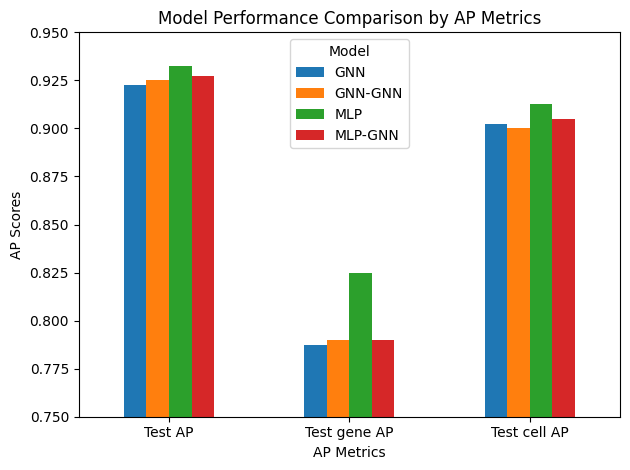

<Figure size 640x480 with 0 Axes>

In [49]:
# Reshape the data for the desired plot
mean_by_model = df.groupby("Model")[["Test AP", "Test gene AP", "Test cell AP"]].mean()

# Transpose the dataframe to have AP metrics on x-axis and models as bars
mean_by_model_transposed = mean_by_model.T

ax = mean_by_model_transposed.plot.bar(rot=0)

# Set the y-axis to start at 0.6
ax.set_ylim(bottom=0.75, top=0.95)

# Set labels
ax.set_xlabel("AP Metrics")
ax.set_ylabel("AP Scores")
ax.set_title("Model Performance Comparison by AP Metrics")

# Adjust plot to prevent labels from being cut off
plt.tight_layout()
plt.show()

plt.savefig("./Data/Figures/Lung/Mean_metrics_per_model.png")

Test_AP and cell_AP more or less the same for all models. 

It is worth noticing how the gene_AP score is higher for the MLP model than for the other ones.

ALso worth noticing: gene_AP scores much lower compared to the other scores. What does this mean? 

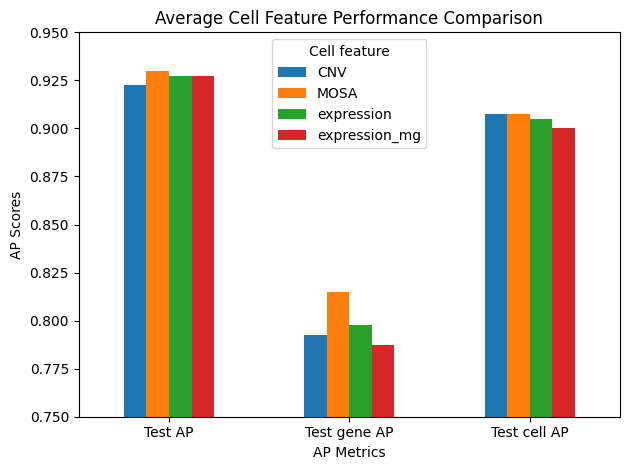

In [ ]:
# Reshape the data for the desired plot
mean_by_cellfeat = df.groupby("Cell feature")[["Test AP", "Test gene AP", "Test cell AP"]].mean()

# Transpose the dataframe to have AP metrics on x-axis and models as bars
mean_by_CF_transposed = mean_by_cellfeat.T

ax = mean_by_CF_transposed.plot.bar(rot=0)

# Set the y-axis to start at 0.6
ax.set_ylim(bottom=0.75, top=0.95)

# Set labels
ax.set_xlabel("AP Metrics")
ax.set_ylabel("AP Scores")
ax.set_title("Cell Feature Performance Averaged over all Models")

# Adjust plot to prevent labels from being cut off
plt.tight_layout()
plt.show()

#Change figure name
plt.savefig("./Data/Figures/Lung/Mean_metrics_per_CF.png")

### AP scores by model 

#### scatter plots

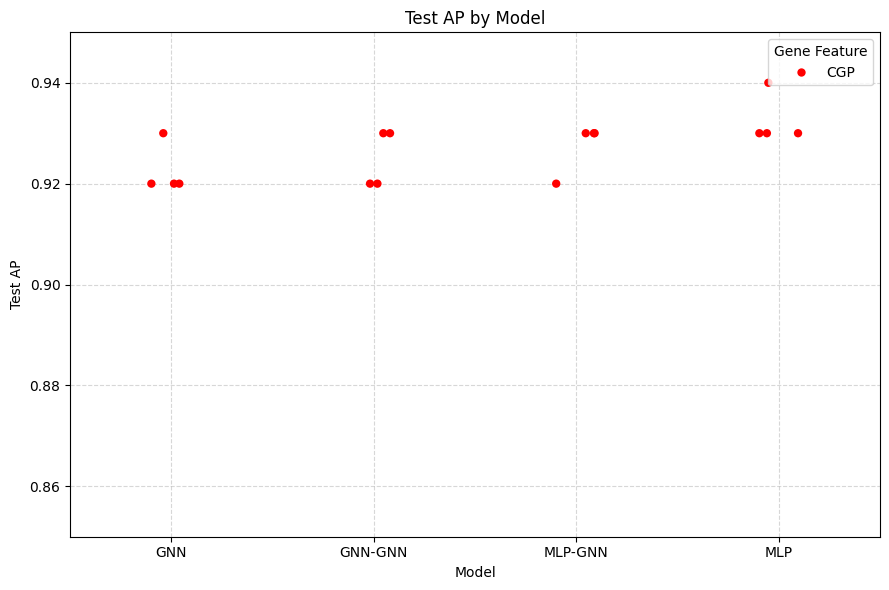

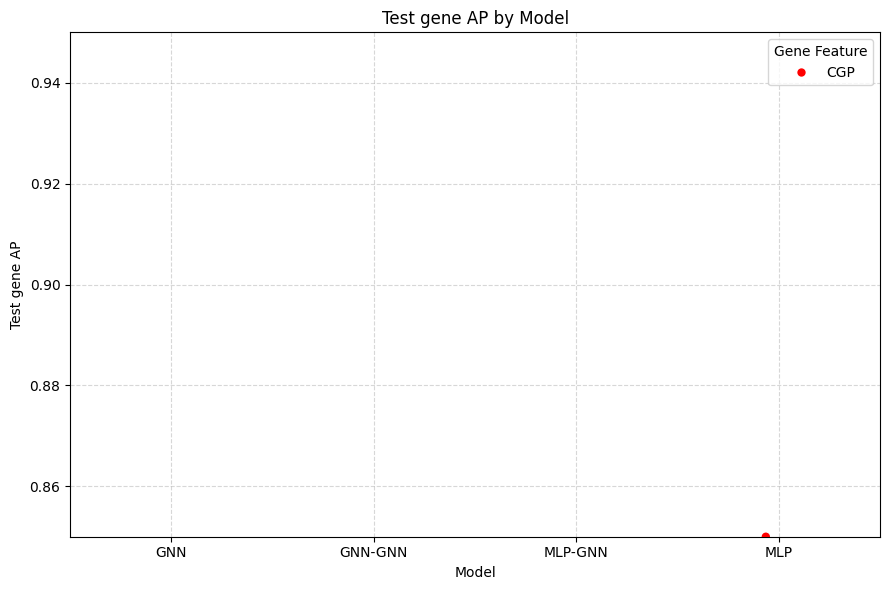

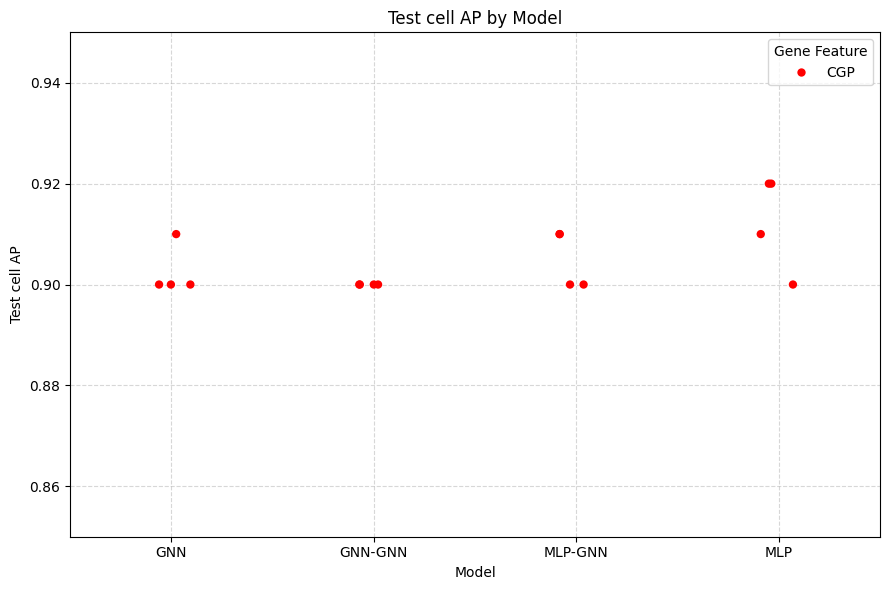

In [52]:

# Map gene features to colors
palette = {"CGP": "red", "C4": "black"}

# Plot
plt.figure(figsize=(9, 6))
sns.stripplot(data=df, x="Model", y="Test AP", hue="Gene feature", palette=palette, jitter=True, size=6)

plt.title("Test AP by Model")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

# Plot
plt.figure(figsize=(9, 6))
sns.stripplot(data=df, x="Model", y="Test gene AP", hue="Gene feature", palette=palette, jitter=True, size=6)

plt.title("Test gene AP by Model")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

# Plot
plt.figure(figsize=(9, 6))
sns.stripplot(data=df, x="Model", y="Test cell AP", hue="Gene feature", palette=palette, jitter=True, size=6)

plt.title("Test cell AP by Model")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

#### boxplots

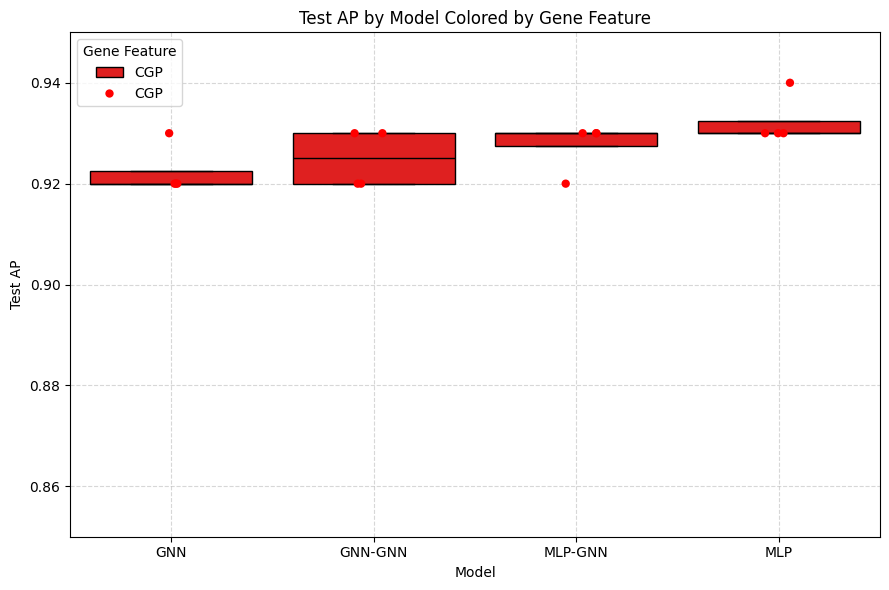

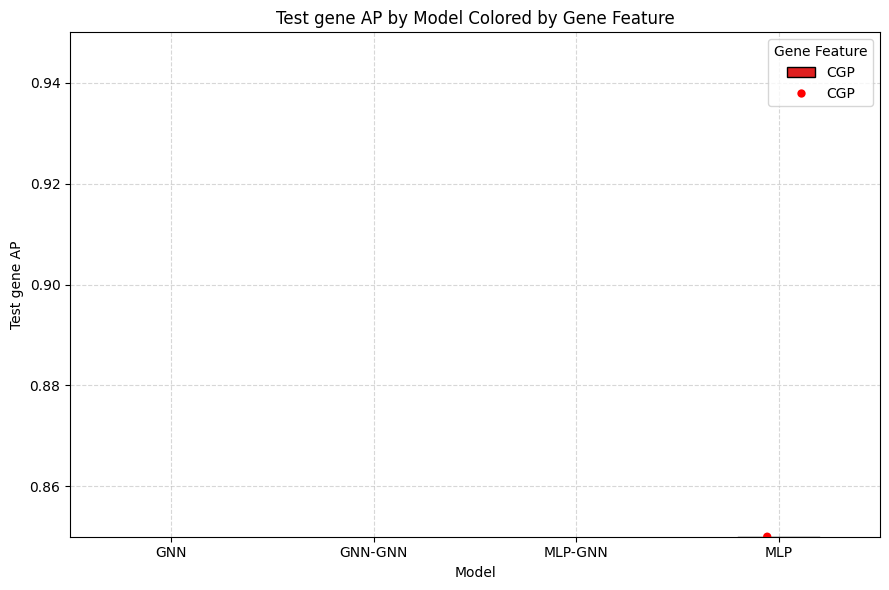

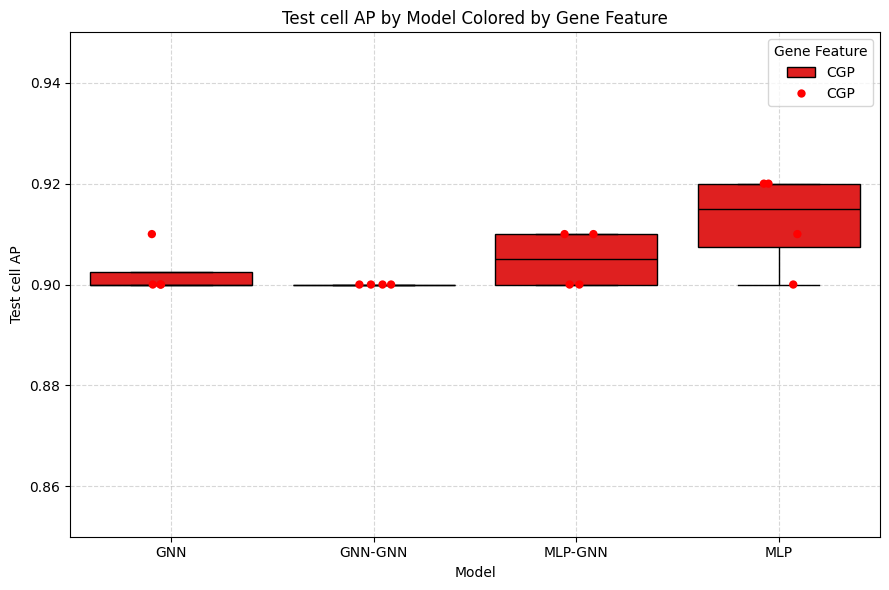

In [53]:

# Map gene features to colors
palette = {"CGP": "red", "C4": "black"}

# Plot
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x="Model", y="Test AP", hue="Gene feature", palette=palette, dodge=True, fliersize=0)
sns.stripplot(data=df, x="Model", y="Test AP", hue="Gene feature", palette=palette, jitter=True, size=6)

plt.title("Test AP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

# Plot
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x="Model", y="Test gene AP", hue="Gene feature", palette=palette, dodge=True, fliersize=0)
sns.stripplot(data=df, x="Model", y="Test gene AP", hue="Gene feature", palette=palette, jitter=True, size=6)

plt.title("Test gene AP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

# Plot
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x="Model", y="Test cell AP", hue="Gene feature", palette=palette, dodge=True, fliersize=0)
sns.stripplot(data=df, x="Model", y="Test cell AP", hue="Gene feature", palette=palette, jitter=True, size=6)

plt.title("Test cell AP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

### AP scores by cell feature

#### colored by gene feature

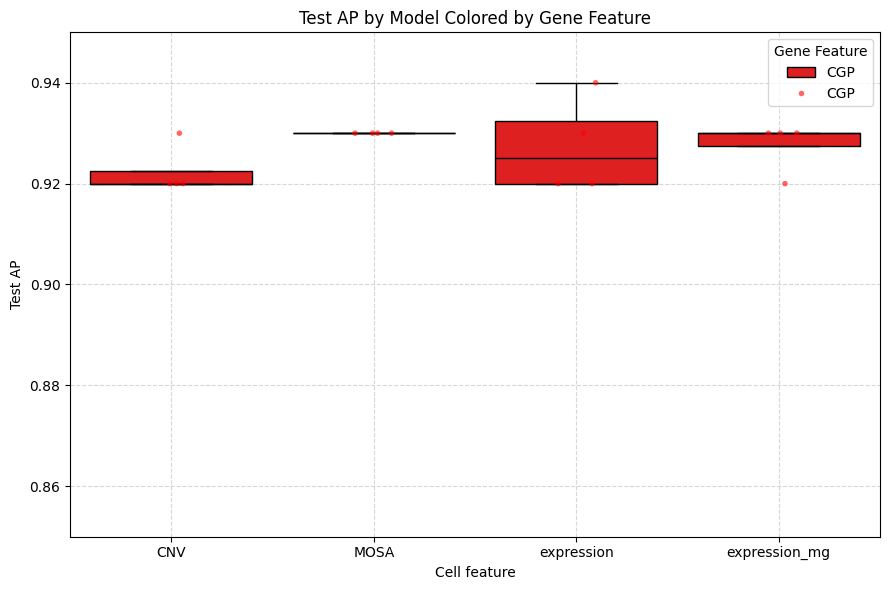

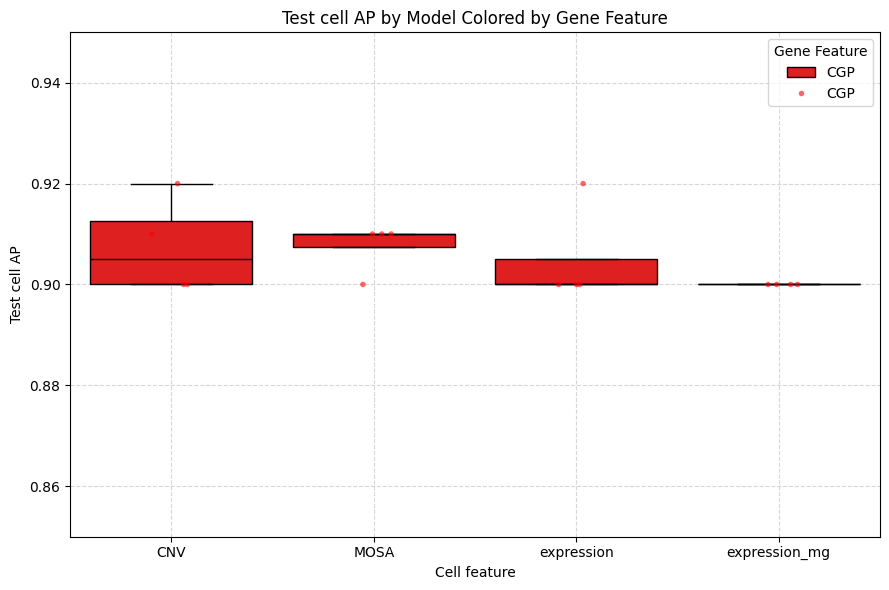

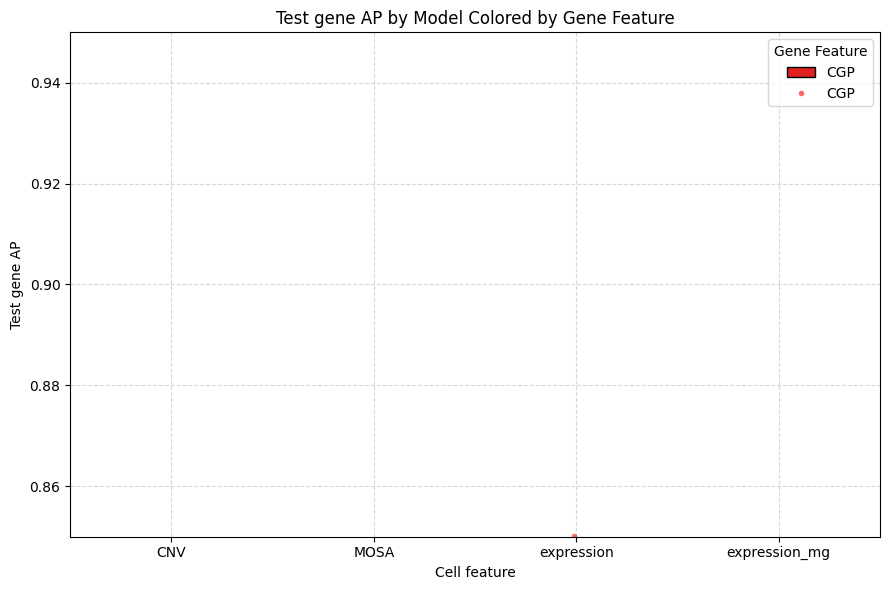

In [54]:
# Plot
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x="Cell feature", y="Test AP", hue="Gene feature", palette=palette, dodge=True, fliersize=0)
sns.stripplot(data=df, x="Cell feature", y="Test AP", hue="Gene feature", palette=palette, dodge=True, jitter=True, size=4, alpha=0.6)

plt.title("Test AP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()


# Plot
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x="Cell feature", y="Test cell AP", hue="Gene feature", palette=palette, dodge=True, fliersize=0)
sns.stripplot(data=df, x="Cell feature", y="Test cell AP", hue="Gene feature", palette=palette, dodge=True, jitter=True, size=4, alpha=0.6)

plt.title("Test cell AP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()


# Plot
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x="Cell feature", y="Test gene AP", hue="Gene feature", palette=palette, dodge=True, fliersize=0)
sns.stripplot(data=df, x="Cell feature", y="Test gene AP", hue="Gene feature", palette=palette, dodge=True, jitter=True, size=4, alpha=0.6)

plt.title("Test gene AP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

#### colored by model

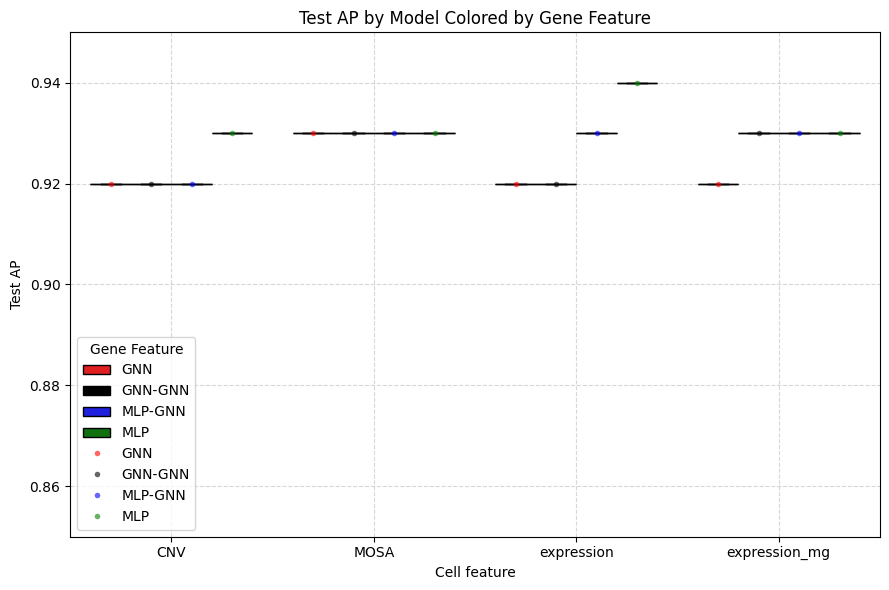

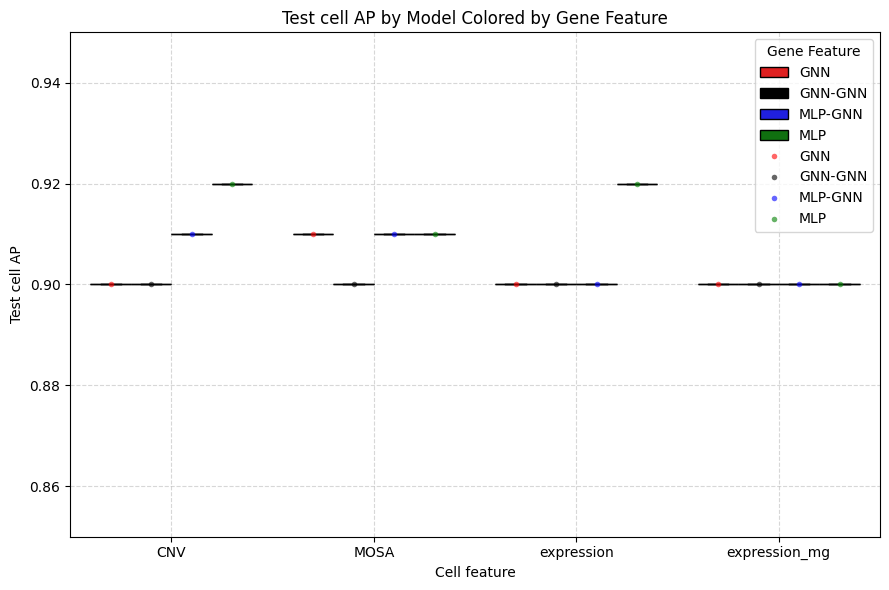

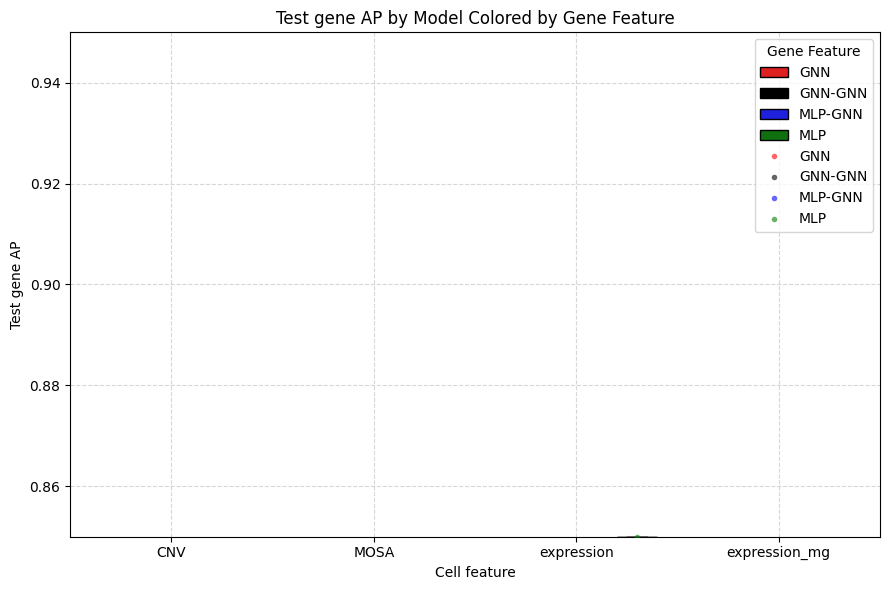

In [55]:
palette2 = {"GNN": "red", "GNN-GNN": "black", "MLP-GNN": "blue", "MLP": "green"}

# Plot
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x="Cell feature", y="Test AP", hue="Model", palette=palette2, dodge=True, fliersize=0)
sns.stripplot(data=df, x="Cell feature", y="Test AP", hue="Model", palette=palette2, dodge=True, jitter=True, size=4, alpha=0.6)

plt.title("Test AP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

# Plot
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x="Cell feature", y="Test cell AP", hue="Model", palette=palette2, dodge=True, fliersize=0)
sns.stripplot(data=df, x="Cell feature", y="Test cell AP", hue="Model", palette=palette2, dodge=True, jitter=True, size=4, alpha=0.6)

plt.title("Test cell AP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

# Plot
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x="Cell feature", y="Test gene AP", hue="Model", palette=palette2, dodge=True, fliersize=0)
sns.stripplot(data=df, x="Cell feature", y="Test gene AP", hue="Model", palette=palette2, dodge=True, jitter=True, size=4, alpha=0.6)

plt.title("Test gene AP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

# 3. Statisctical tests

## For model

In [56]:
from scipy.stats import f_oneway

# Example: Test AP by model
groups = [df[df["Model"] == model]["Test AP"] for model in df["Model"].unique()]
f_stat, p_val = f_oneway(*groups)
print("ANOVA Test AP by Model: p =", p_val)


ANOVA Test AP by Model: p = 0.09312557556749472


Null hypothesis: all model's test AP are equal 
--> cannot be rejected because p = 0,14 > 0,05

In [57]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df["Test AP"], groups=df["Model"], alpha=0.05)
print(tukey)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
    GNN GNN-GNN   0.0025 0.9029 -0.0084 0.0134  False
    GNN     MLP     0.01 0.0769 -0.0009 0.0209  False
    GNN MLP-GNN    0.005 0.5461 -0.0059 0.0159  False
GNN-GNN     MLP   0.0075  0.228 -0.0034 0.0184  False
GNN-GNN MLP-GNN   0.0025 0.9029 -0.0084 0.0134  False
    MLP MLP-GNN   -0.005 0.5461 -0.0159 0.0059  False
-----------------------------------------------------


Conclusion: all models score equally well

## For gene feature

In [58]:
tukey = pairwise_tukeyhsd(endog=df["Test AP"], groups=df["Gene feature"], alpha=0.05)
print(tukey)

groups = [df[df["Gene feature"] == feature]["Test AP"] for feature in df["Gene feature"].unique()]
f_stat, p_val = f_oneway(*groups)
print("ANOVA Test AP by Gene Feature: p =", p_val)

df.groupby("Gene feature")["Test AP"].mean()


ValueError: 2 or more groups required for multiple comparisons

Conclusion: p<0.05. This means that the CGP scores significantly better than the C4 ?

In [13]:
tukey = pairwise_tukeyhsd(endog=df["Test gene AP"], groups=df["Gene feature"], alpha=0.05)
print(tukey)

groups = [df[df["Gene feature"] == feature]["Test gene AP"] for feature in df["Gene feature"].unique()]
f_stat, p_val = f_oneway(*groups)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    C4    CGP   0.0056 0.3133 -0.0056 0.0168  False
---------------------------------------------------


In [14]:
tukey = pairwise_tukeyhsd(endog=df["Test cell AP"], groups=df["Gene feature"], alpha=0.05)
print(tukey)

groups = [df[df["Gene feature"] == feature]["Test cell AP"] for feature in df["Gene feature"].unique()]
f_stat, p_val = f_oneway(*groups)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
    C4    CGP   0.0125 0.0039 0.0043 0.0207   True
--------------------------------------------------


In [15]:
df.groupby("Gene feature")["Test cell AP"].mean()


Gene feature
C4     0.881875
CGP    0.894375
Name: Test cell AP, dtype: float64

## For cell features

In [16]:
tukey = pairwise_tukeyhsd(endog=df["Test gene AP"], groups=df["Cell feature"], alpha=0.05)
print(tukey)

df.groupby("Cell feature")["Test gene AP"].mean()



     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1       group2    meandiff p-adj   lower  upper  reject
--------------------------------------------------------------
       CNV          MOSA   0.0275 0.0008  0.0104 0.0446   True
       CNV    expression   0.0162 0.0668 -0.0008 0.0333  False
       CNV expression_mg   0.0125 0.2131 -0.0046 0.0296  False
      MOSA    expression  -0.0112 0.2957 -0.0283 0.0058  False
      MOSA expression_mg   -0.015  0.101 -0.0321 0.0021  False
expression expression_mg  -0.0038 0.9315 -0.0208 0.0133  False
--------------------------------------------------------------


Cell feature
CNV              0.88500
MOSA             0.91250
expression       0.90125
expression_mg    0.89750
Name: Test gene AP, dtype: float64

In [17]:
tukey = pairwise_tukeyhsd(endog=df["Test AP"], groups=df["Cell feature"], alpha=0.05)
print(tukey)

df.groupby("Cell feature")["Test AP"].mean()


     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1       group2    meandiff p-adj   lower  upper  reject
--------------------------------------------------------------
       CNV          MOSA   0.0038 0.9451 -0.0148 0.0223  False
       CNV    expression    0.005 0.8816 -0.0135 0.0235  False
       CNV expression_mg     -0.0    1.0 -0.0185 0.0185  False
      MOSA    expression   0.0012 0.9977 -0.0173 0.0198  False
      MOSA expression_mg  -0.0038 0.9451 -0.0223 0.0148  False
expression expression_mg   -0.005 0.8816 -0.0235 0.0135  False
--------------------------------------------------------------


Cell feature
CNV              0.91125
MOSA             0.91500
expression       0.91625
expression_mg    0.91125
Name: Test AP, dtype: float64

In [18]:
tukey = pairwise_tukeyhsd(endog=df["Test cell AP"], groups=df["Cell feature"], alpha=0.05)
print(tukey)

df.groupby("Cell feature")["Test cell AP"].mean()


     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1       group2    meandiff p-adj   lower  upper  reject
--------------------------------------------------------------
       CNV          MOSA  -0.0038 0.9423 -0.0219 0.0144  False
       CNV    expression  -0.0038 0.9423 -0.0219 0.0144  False
       CNV expression_mg   -0.005 0.8758 -0.0232 0.0132  False
      MOSA    expression     -0.0    1.0 -0.0182 0.0182  False
      MOSA expression_mg  -0.0012 0.9976 -0.0194 0.0169  False
expression expression_mg  -0.0012 0.9976 -0.0194 0.0169  False
--------------------------------------------------------------


Cell feature
CNV              0.89125
MOSA             0.88750
expression       0.88750
expression_mg    0.88625
Name: Test cell AP, dtype: float64

# Analysis grid_results

/var/folders/ds/76n_grr91zn97zn1yl541y5c0000gn/T/ipykernel_18120/4163851873.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(data=combined_df, x='model', y=metric,


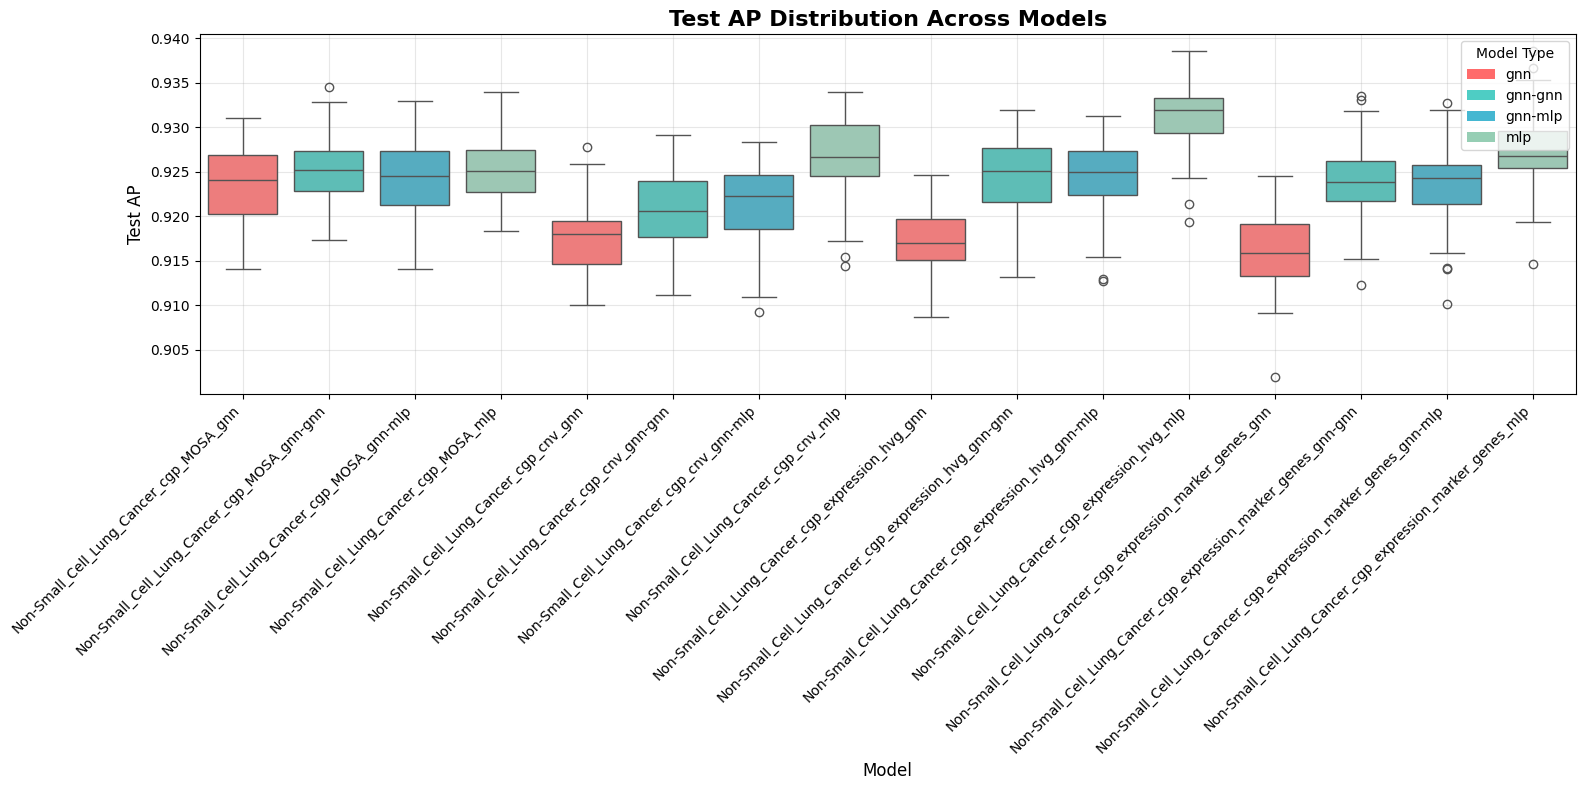

/var/folders/ds/76n_grr91zn97zn1yl541y5c0000gn/T/ipykernel_18120/4163851873.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(data=combined_df, x='model', y=metric,


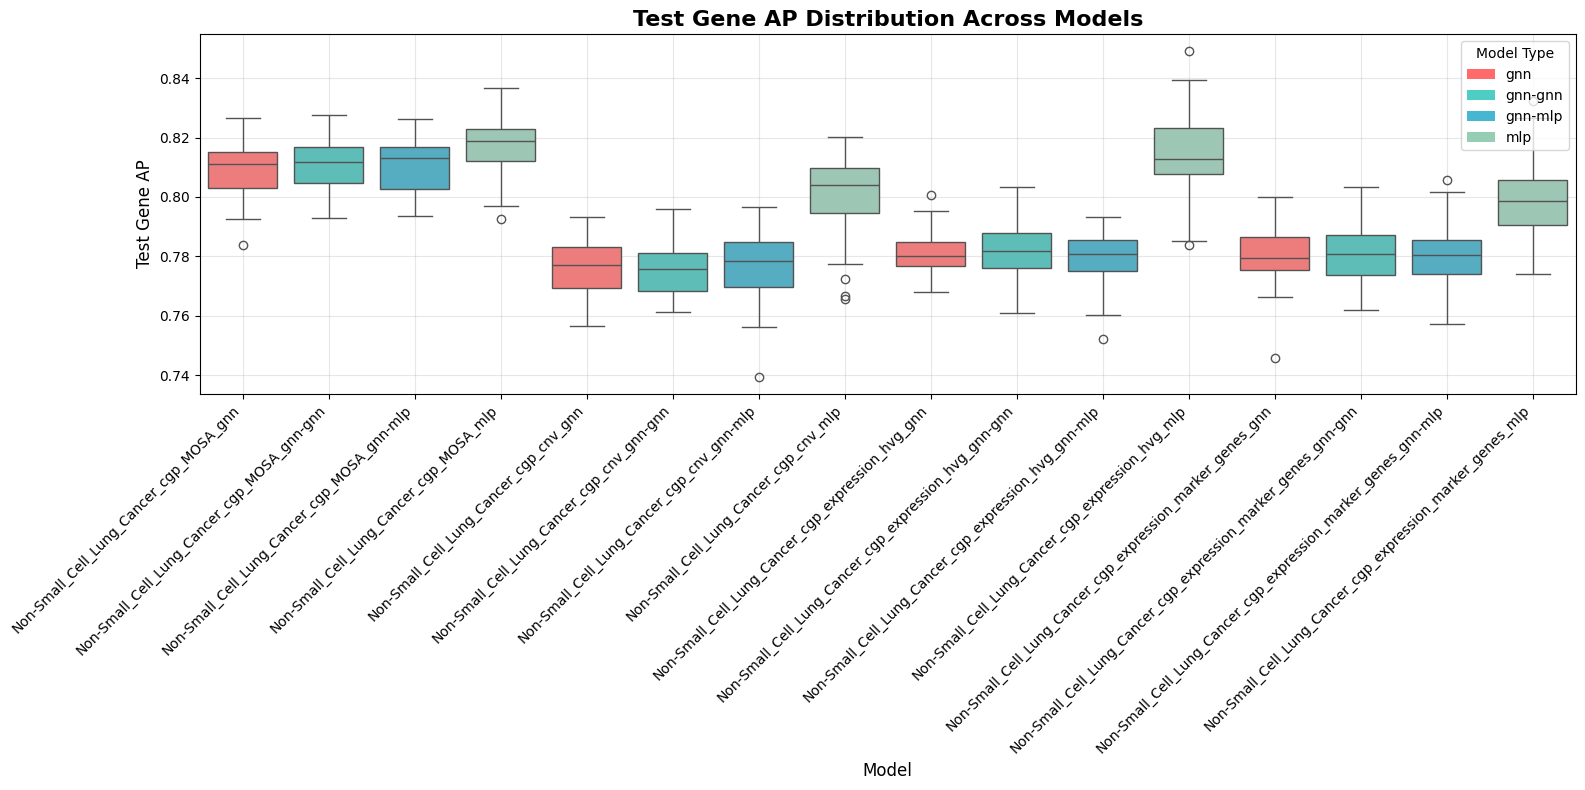

/var/folders/ds/76n_grr91zn97zn1yl541y5c0000gn/T/ipykernel_18120/4163851873.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(data=combined_df, x='model', y=metric,


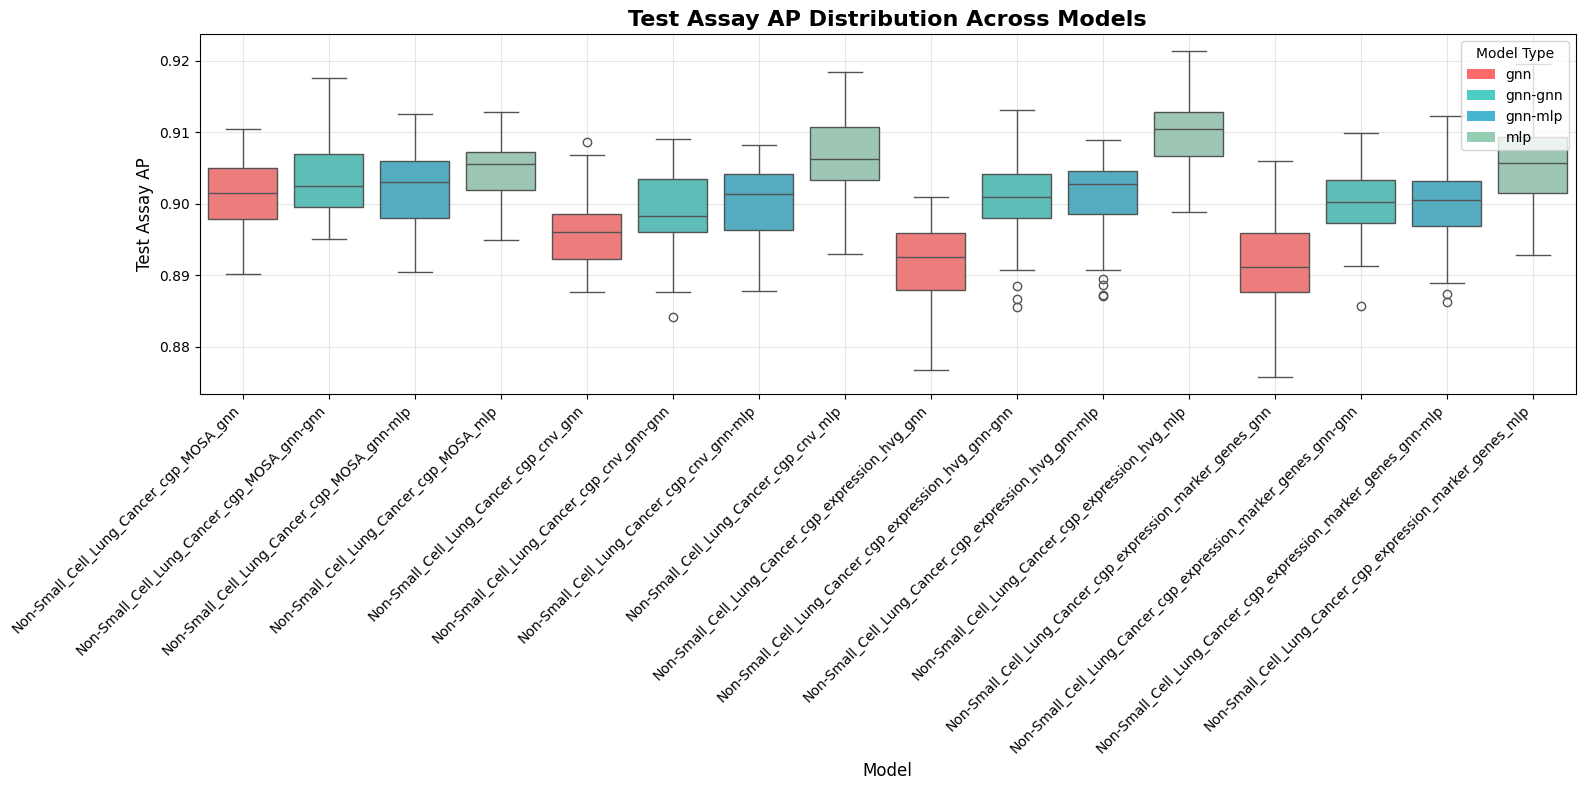

Summary Statistics by Model Type:

TEST_AP:
By Model Type:
            count    mean     std     min     max
model_type                                       
gnn           211  0.9186  0.0049  0.9019  0.9311
gnn-gnn       215  0.9235  0.0044  0.9111  0.9345
gnn-mlp       212  0.9233  0.0045  0.9092  0.9330
mlp           213  0.9276  0.0048  0.9143  0.9386

By Individual Model:
                                                                 mean     std
model_type model                                                             
gnn        Non-Small_Cell_Lung_Cancer_cgp_MOSA_gnn             0.9236  0.0043
           Non-Small_Cell_Lung_Cancer_cgp_cnv_gnn              0.9174  0.0039
           Non-Small_Cell_Lung_Cancer_cgp_expression_hvg_gnn   0.9170  0.0033
           Non-Small_Cell_Lung_Cancer_cgp_expression_marke...  0.9161  0.0042
gnn-gnn    Non-Small_Cell_Lung_Cancer_cgp_MOSA_gnn-gnn         0.9252  0.0035
           Non-Small_Cell_Lung_Cancer_cgp_cnv_gnn-gnn          0.9207  0.

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from pathlib import Path

# Set style for better-looking plots
plt.style.use('default')

# Find all grid_results.csv files
pattern = "./Results/Lung_results/*/grid_search/grid_results.csv"
csv_files = glob.glob(pattern)

# Function to extract model type from folder name
def extract_model_type(folder_name):
    folder_lower = folder_name.lower()
    if 'gnn-gnn' in folder_lower:
        return 'gnn-gnn'
    elif 'gnn-mlp' in folder_lower:
        return 'gnn-mlp'
    elif 'gnn' in folder_lower:
        return 'gnn'
    elif 'mlp' in folder_lower:
        return 'mlp'
    else:
        return 'unknown'

# Read and combine all CSV files
all_data = []
for file_path in csv_files:
    # Extract model name from path
    model_name = file_path.split('/')[-3]  # Gets the directory name before /grid_search/
    model_type = extract_model_type(model_name)
    
    # Read CSV
    df = pd.read_csv(file_path)
    df['model'] = model_name
    df['model_type'] = model_type
    all_data.append(df)

# Combine all dataframes
combined_df = pd.concat(all_data, ignore_index=True)

# Define colors for each model type
model_colors = {
    'gnn': '#FF6B6B',      # Red
    'gnn-gnn': '#4ECDC4',  # Teal
    'gnn-mlp': '#45B7D1',  # Blue
    'mlp': '#96CEB4'       # Green
}

# Define the metrics to plot
metrics = ['test_AP', 'test_gene_AP', 'test_assay_AP']
metric_names = ['Test AP', 'Test Gene AP', 'Test Assay AP']

# Create boxplots for each metric
for i, (metric, metric_name) in enumerate(zip(metrics, metric_names)):
    plt.figure(figsize=(16, 8))
    
    # Create color palette based on model type for each model
    model_order = sorted(combined_df['model'].unique())
    colors = [model_colors[combined_df[combined_df['model'] == model]['model_type'].iloc[0]] 
              for model in model_order]
    
    # Create boxplot with custom colors
    box_plot = sns.boxplot(data=combined_df, x='model', y=metric, 
                          order=model_order, palette=colors)
    
    # Customize the plot
    plt.title(f'{metric_name} Distribution Across Models', fontsize=16, fontweight='bold')
    plt.xlabel('Model', fontsize=12)
    plt.ylabel(metric_name, fontsize=12)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Add grid for better readability
    plt.grid(True, alpha=0.3)
    
    # Create legend for model types
    legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color, label=model_type) 
                      for model_type, color in model_colors.items()]
    plt.legend(handles=legend_elements, title='Model Type', loc='upper right')
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Optional: Print summary statistics by model type
print("Summary Statistics by Model Type:")
print("="*50)
for metric in metrics:
    print(f"\n{metric.upper()}:")
    print("By Model Type:")
    summary_by_type = combined_df.groupby('model_type')[metric].agg(['count', 'mean', 'std', 'min', 'max'])
    print(summary_by_type.round(4))
    print("\nBy Individual Model:")
    summary_by_model = combined_df.groupby(['model_type', 'model'])[metric].agg(['mean', 'std']).round(4)
    print(summary_by_model)